In [1]:
import acquire as a
import prepare as p
import explore as e
import model as m

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
train, validate, test = p.split_data(p.prepare_data(a.acquire_data()),'churn')

File exists - reading CSV file


In [3]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'monthly_charges', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [3]:
top_three = e.top_three_rel_columns(train, 'churn')
top_three

['online_security', 'tech_support', 'contract_type']

In [4]:
train.churn = np.where(train['churn'] == 'Yes',1,0)

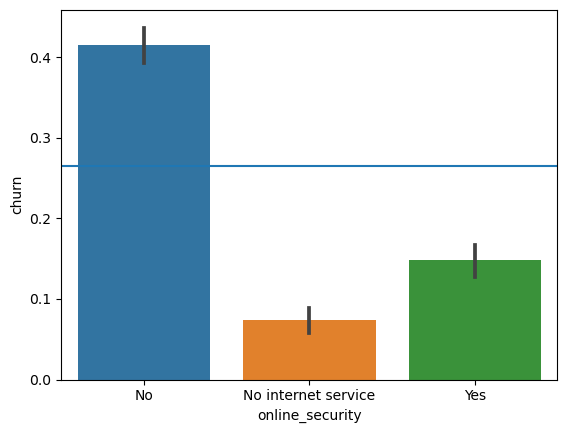

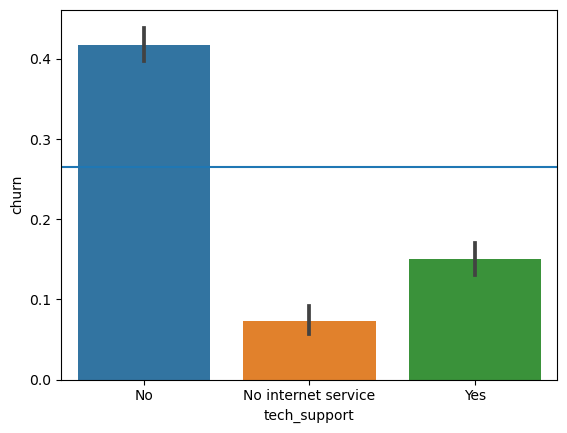

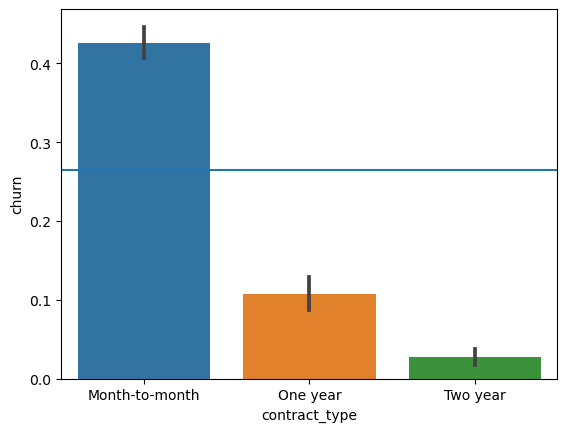

In [6]:
for col in top_three:
    sns.barplot(x=(col),y='churn',data=train.sort_values(col))
    plt.axhline(train.churn.mean())
    plt.show()

<Axes: xlabel='monthly_charges', ylabel='Count'>

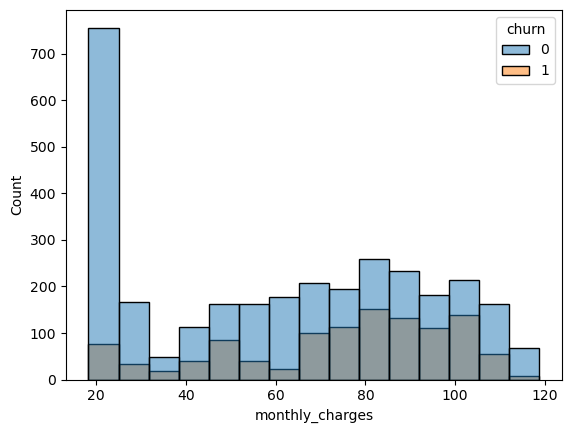

In [14]:
sns.histplot(data=train,x='monthly_charges',hue='churn')